In [1]:
import torchvision.utils as vutils
import copy
import math
import os
import numpy as np
from PIL import Image, ImageFile
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torch.utils.data as td
import torchvision as tv
import pandas as pd
from torch.autograd import Variable
from io import BytesIO
import itertools
from image_pool import ImagePool
import time
from dataset import ArtDataset,LandscapeDataset,myimshow
from model import weights_init,Generator,Discriminator

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
print(device)

cuda


In [3]:
batchsize = 1
landscape_root_dir = '/datasets/ee285f-public/flickr_landscape/'
art_root_dir = '/datasets/ee285f-public/wikiart'

In [4]:
X_sets = LandscapeDataset(landscape_root_dir)
X_loader =  list(td.DataLoader(X_sets, batch_size = batchsize, shuffle = True, pin_memory = True))

In [5]:
Y_sets = ArtDataset(art_root_dir)
Y_loader =  list(td.DataLoader(Y_sets, batch_size = batchsize, shuffle = True, pin_memory = True))

In [6]:
input_nc = 3    # the number of channels of input data
output_nc = 3 # the number of channels of output data
# Create the discriminator D_X--distinguish the image X in domain X and F(Y)
D_X = Discriminator(input_nc).to(device)
D_X.apply(weights_init)

# Create the discriminator D_Y--distinguish the image Y in domain Y and G(X)
D_Y = Discriminator(output_nc).to(device)
D_X.apply(weights_init)

# Create the generator G--Generator the image from X to Y domain
G = Generator(input_nc, output_nc).to(device)
G.apply(weights_init)

# Create the generator F--Generator the image from Y to X domain
F = Generator(input_nc, output_nc).to(device)
F.apply(weights_init)

Generator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace)
    (10): ResidualBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace)
        (4): ReflectionPad2d((1, 1, 1, 1))
        (5): Conv2d(256, 256,

In [7]:
G.load_state_dict(torch.load('output2/G.pth'))
F.load_state_dict(torch.load('output2/F.pth'))
D_X.load_state_dict(torch.load('output2/D_X.pth'))
D_Y.load_state_dict(torch.load('output2/D_Y.pth'))

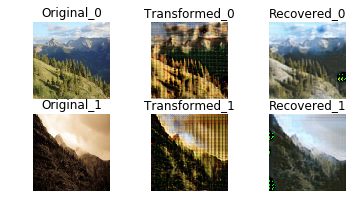

In [8]:
set=2
fig = plt.figure(figsize = (6,10*set))
for ind in range(set):
    X=X_loader[ind].cuda()
    Y=Y_loader[ind].cuda()
    
    plt.subplot(6*set, 3, 3*ind + 1)
    myimshow(X[0])
    plt.title('Original_%d' % (ind))

    fake_Y=G(X)
    plt.subplot(6*set, 3, 3*ind + 2)
    myimshow(fake_Y[0].detach(), ax = plt)
    plt.title('Transformed_%d' % (ind))

    rec_X=F(fake_Y)
    plt.subplot(6*set, 3, 3*ind + 3)
    myimshow(rec_X[0].detach(), ax = plt)
    plt.title('Recovered_%d' % (ind))
